# SVM & Naive bayes

1. What is a Support Vector Machine (SVM)?
   - Support Vector Machine is a supervised learning algorithm used for classification and regression. It finds the best boundary (hyperplane) that separates data points of different classes with maximum margin.

2. What is the difference between Hard Margin and Soft Margin SVM?
   - Hard Margin SVM does not allow any misclassification and works only when data is perfectly separable.
   - Soft Margin SVM allows some errors and works well with noisy and overlapping data.

3. What is the mathematical intuition behind SVM?
   - SVM tries to find a hyperplane that maximizes the margin between two classes so that the separation between classes is as wide as possible.

4. What is the role of Lagrange Multipliers in SVM?
   - Lagrange multipliers help convert the constrained optimization problem into an unconstrained form and identify important training points that define the decision boundary.

5. What are Support Vectors in SVM?
   - Support vectors are the data points that lie closest to the decision boundary and directly influence the position of the hyperplane.

6. What is a Support Vector Classifier (SVC)?
   - Support Vector Classifier is the SVM version used for classification tasks, where the output is a class label.

7. What is a Support Vector Regressor (SVR)?
   - Support Vector Regressor is the SVM version used for regression tasks, where the output is a continuous value.

8. What is the Kernel Trick in SVM?
   - The kernel trick maps data into a higher-dimensional space so that non-linear data can be separated using a linear boundary.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?
   - Linear Kernel is used when data is linearly separable. Polynomial Kernel handles curved boundaries. RBF Kernel works well for complex and non-linear data patterns.

10. What is the effect of the C parameter in SVM?
    - The C parameter controls the trade-off between maximizing margin and minimizing classification error. High C means less error but more overfitting; low C means wider margin but more misclassification.

11. What is the role of the Gamma parameter in RBF Kernel SVM?
    - Gamma controls how far the influence of a single data point reaches. High gamma fits data closely, low gamma makes smoother boundaries.

12. What is the Naive Bayes classifier, and why is it called "Naive"?
    - Naive Bayes is a probabilistic classifier based on Bayes’ Theorem. It is called "Naive" because it assumes all features are independent.

13. What is Bayes’ Theorem?
    - Bayes’ Theorem calculates the probability of an event based on prior knowledge and evidence using conditional probability.

14. Explain the differences between Gaussian naive Bayes, Multinomial naive
     Bayes, and Bernoulli Naive Bayes?
    - Gaussian is used for continuous data, Multinomial is used for count-based data like text, and Bernoulli is used for binary data.

15. When should you use Gaussian Naive Bayes over other variants?
    - Use Gaussian Naive Bayes when the features are continuous and follow a normal distribution.

16. What are the key assumptions of Naive Bayes?
    - It assumes all features are independent and each feature contributes equally to the prediction.

17. What are the advantages and disadvantages of Naive Bayes?
    - Advantages: Fast, simple, works well with large data.
    - Disadvantages: Assumes independence which is often unrealistic and may  reduce accuracy.

18. Why is Naive Bayes a good choice for text classification?
    - It handles high-dimensional data well and works efficiently with word frequency features.

19. Compare SVM and Naive Bayes for classification tasks?
    - SVM is more accurate for complex boundaries but slower. Naive Bayes is faster but less accurate due to independence assumption.

20. How does Laplace Smoothing help in Naive Bayes?
    - Laplace smoothing avoids zero probabilities by adding a small value to all counts, making predictions more stable.


In [1]:
#21 Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
#22 Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = SVC(kernel="linear")
rbf_model = SVC(kernel="rbf")

linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
y_pred_rbf = rbf_model.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [3]:
#23 Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)?

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1.3320115421348744


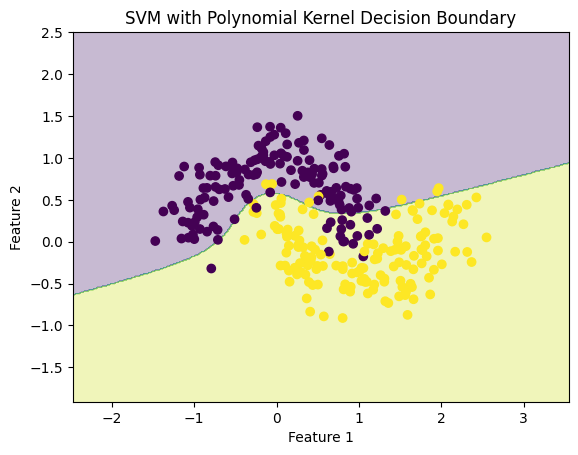

In [4]:
#24 Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = SVC(kernel='poly', degree=3, C=1)
model.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("SVM with Polynomial Kernel Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [5]:
#25 Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy?

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9415204678362573


In [6]:
#26 Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset="all")
X = data.data
y = data.target

vectorizer = CountVectorizer(stop_words="english", max_features=5000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.3, random_state=42
)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8188892819243013


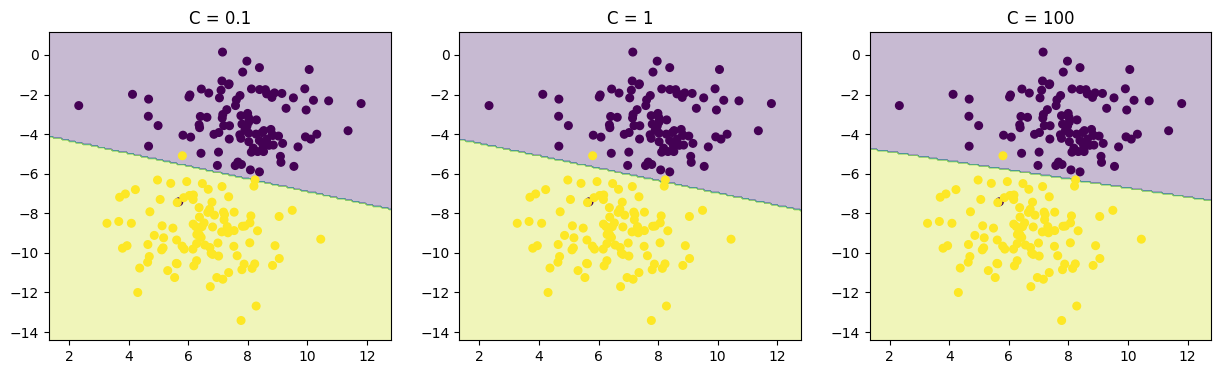

In [7]:
#27 Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=200, centers=2, random_state=6, cluster_std=1.5)

C_values = [0.1, 1, 100]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, C in zip(axes, C_values):
    model = SVC(kernel="linear", C=C)
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30)
    ax.set_title("C = " + str(C))

plt.show()


In [8]:
#28 Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features?

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

X = np.random.randint(0, 2, (200, 10))
y = np.random.randint(0, 2, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.4666666666666667


In [9]:
#29 Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data?

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC()
model_scaled.fit(X_train_scaled, y_train)
pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, pred_scaled)

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling:", acc_scaled)


Accuracy without scaling: 0.935672514619883
Accuracy with scaling: 0.9766081871345029


In [10]:
#30 Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_no_smooth = GaussianNB(var_smoothing=1e-9)
model_no_smooth.fit(X_train, y_train)
pred_no_smooth = model_no_smooth.predict(X_test)
acc_no_smooth = accuracy_score(y_test, pred_no_smooth)

model_smooth = GaussianNB(var_smoothing=1e-2)
model_smooth.fit(X_train, y_train)
pred_smooth = model_smooth.predict(X_test)
acc_smooth = accuracy_score(y_test, pred_smooth)

print("Accuracy without smoothing:", acc_no_smooth)
print("Accuracy with smoothing:", acc_smooth)
print("First 10 predictions without smoothing:", pred_no_smooth[:10])
print("First 10 predictions with smoothing:", pred_smooth[:10])


Accuracy without smoothing: 0.9415204678362573
Accuracy with smoothing: 0.935672514619883
First 10 predictions without smoothing: [1 0 0 1 1 0 0 0 1 1]
First 10 predictions with smoothing: [1 0 0 1 1 0 0 0 1 1]


In [14]:
#31 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1],
    "kernel": ["linear", "rbf"]
}

model = SVC()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.9707602339181286


In [13]:
#32 Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_no_weight = SVC()
model_no_weight.fit(X_train, y_train)
y_pred_no_weight = model_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, y_pred_no_weight)

model_weighted = SVC(class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print("Accuracy without class weighting:", acc_no_weight)
print("Accuracy with class weighting:", acc_weighted)
print("\nClassification report with class weighting:\n", classification_report(y_test, y_pred_weighted))


Accuracy without class weighting: 0.94
Accuracy with class weighting: 0.9133333333333333

Classification report with class weighting:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       267
           1       0.59      0.73      0.65        33

    accuracy                           0.91       300
   macro avg       0.78      0.83      0.80       300
weighted avg       0.92      0.91      0.92       300



In [15]:
#33 Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample email dataset
emails = [
    "Congratulations! You've won a $1000 gift card",
    "Hi, are we still meeting tomorrow?",
    "Earn money fast from home!!!",
    "Please review the attached report",
    "Limited time offer, claim your prize",
    "Let's have lunch today",
    "Get cheap loans now",
    "Project deadline is next week",
    "You have been selected for a free trip",
    "Can we reschedule our meeting?"
]

labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Spam, 0 = Not Spam

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [16]:
#34 Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

emails = [
    "Congratulations! You've won a $1000 gift card",
    "Hi, are we still meeting tomorrow?",
    "Earn money fast from home!!!",
    "Please review the attached report",
    "Limited time offer, claim your prize",
    "Let's have lunch today",
    "Get cheap loans now",
    "Project deadline is next week",
    "You have been selected for a free trip",
    "Can we reschedule our meeting?"
]

labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)
acc_nb = accuracy_score(y_test, y_pred_nb)

# SVM
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("Naive Bayes Accuracy:", acc_nb)
print("SVM Accuracy:", acc_svm)

print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))


Naive Bayes Accuracy: 0.6666666666666666
SVM Accuracy: 0.6666666666666666

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [17]:
#35 Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report

categories = ['alt.atheism', 'sci.space', 'comp.graphics', 'rec.sport.baseball']
data = fetch_20newsgroups(subset='all', categories=categories)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model_full = MultinomialNB()
model_full.fit(X_train_vec, y_train)
y_pred_full = model_full.predict(X_test_vec)
acc_full = accuracy_score(y_test, y_pred_full)

selector = SelectKBest(chi2, k=2000)
X_train_sel = selector.fit_transform(X_train_vec, y_train)
X_test_sel = selector.transform(X_test_vec)

model_sel = MultinomialNB()
model_sel.fit(X_train_sel, y_train)
y_pred_sel = model_sel.predict(X_test_sel)
acc_sel = accuracy_score(y_test, y_pred_sel)

print("Accuracy without feature selection:", acc_full)
print("Accuracy with feature selection:", acc_sel)


Accuracy without feature selection: 0.9813499111900533
Accuracy with feature selection: 0.9742451154529307


In [18]:
#36 Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ovr_model = OneVsRestClassifier(SVC(kernel='linear'))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

ovo_model = OneVsOneClassifier(SVC(kernel='linear'))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print("One-vs-Rest Accuracy:", acc_ovr)
print("One-vs-One Accuracy:", acc_ovo)


One-vs-Rest Accuracy: 0.9814814814814815
One-vs-One Accuracy: 0.9814814814814815


In [19]:
#37 Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ["linear", "poly", "rbf"]
accuracies = {}

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[k] = accuracy_score(y_test, y_pred)

for k, acc in accuracies.items():
    print(f"{k.capitalize()} Kernel Accuracy:", acc)


Linear Kernel Accuracy: 0.9649122807017544
Poly Kernel Accuracy: 0.9415204678362573
Rbf Kernel Accuracy: 0.935672514619883


In [21]:
#38 Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

svm_model = SVC(kernel="linear")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, X, y, cv=skf)

print("Accuracy for each fold:", scores)
print("Average Accuracy:", np.mean(scores))


Accuracy for each fold: [0.94736842 0.92982456 0.95614035 0.93859649 0.96460177]
Average Accuracy: 0.9473063188945815


In [22]:
#39  Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

priors_list = [None, [0.7, 0.3], [0.3, 0.7]]

for priors in priors_list:
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Priors:", priors)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-"*50)


Priors: None
Accuracy: 0.9415204678362573
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

--------------------------------------------------
Priors: [0.7, 0.3]
Accuracy: 0.935672514619883
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

--------------------------------------------------
Priors: [0.3, 0.7]
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        6

In [23]:
#40 Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_full = SVC(kernel='linear')
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

rfe_selector = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10, step=1)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

model_rfe = SVC(kernel='linear')
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

print("Accuracy without RFE:", acc_full)
print("Accuracy with RFE:", acc_rfe)


Accuracy without RFE: 0.9649122807017544
Accuracy with RFE: 0.9298245614035088


In [24]:
#41 Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1-Score: 0.9724770642201835

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [25]:
#42 Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)

loss = log_loss(y_test, y_prob)
print("Log Loss (Cross-Entropy Loss):", loss)


Log Loss (Cross-Entropy Loss): 0.48986013210958873


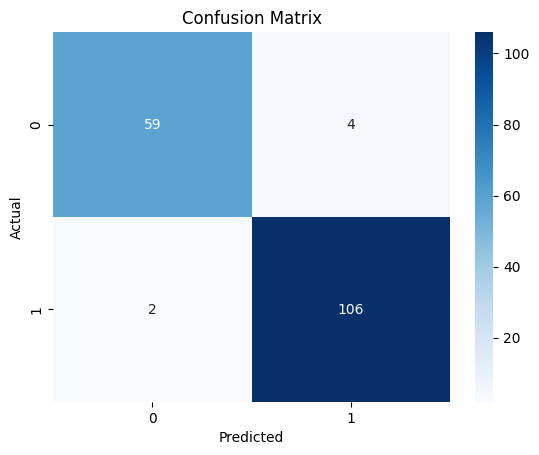

In [26]:
#43 Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
#44 Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.8664984635504496


ROC-AUC Score: 0.9922104644326867


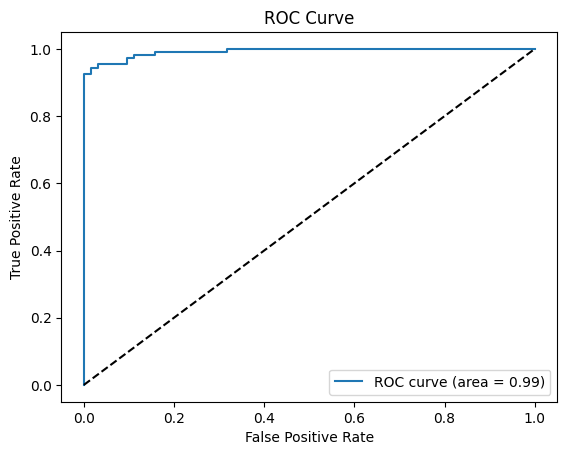

In [28]:
#45 Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


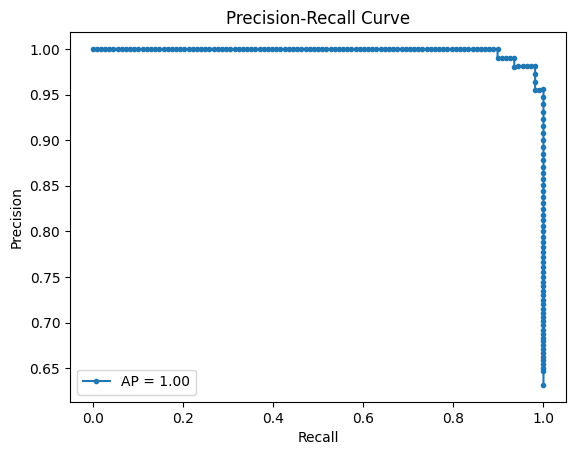

In [29]:
#46 Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, marker='.', label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
